In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# To read data from the Excel file and store it in a DataFrame data
data = pd.read_excel('Data_analyst_Data.xlsx')
data

First Name              Email ID  Quantity  \
0           ANIKET        aniket@xyz.com         1   
1        Dhanshree     dhanshree@xyz.com         1   
2           Dhiraj        dhiraj@xyz.com         1   
3            Pooja         pooja@xyz.com         1   
4           Aayush        aayush@xyz.com         1   
...            ...                   ...       ...   
2152   Patel Niraj    patelniraj@xyz.com         1   
2153         VIDIT         vidit@xyz.com         1   
2154  Suryaprakash  suryaprakash@xyz.com         1   
2155      Saif ali       saifali@xyz.com         1   
2156       Lankesh       lankesh@xyz.com         1   

                                 Events Attendee Status  \
0                Art of Resume Building       Attending   
1                Art of Resume Building       Attending   
2                Art of Resume Building       Attending   
3                Art of Resume Building       Attending   
4                Art of Resume Building       Attending   
...                                 ...             ...   
2152   The SDLC & their transformations       Attending   
2153  Data Visualization using Power BI       Attending   
2154  Data Visualization using Power BI       Attending   
2155  Data Visualization using Power BI       Attending   
2156  Data Visualization using Power BI       Attending   

                                           College Name  \
0     D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...   
1                      AP SHAH INSTITUTE OF TECHNOLOGY    
2          Don Bosco College of Engineering Fatorda Goa   
3              Pillai College of Engineering New Panvel   
4                                  St Xavier's College    
...                                                 ...   
2152  thakur institute of management studies, career...   
2153                 government polytechnic gandhinagar   
2154          vishwakarma institute of technology, pune   
2155                 mit academy of engineering ,alandi   
2156                 a. c. patil college of engineering   

     How did you come to know about this event?  \
0                                         Email   
1                                        Others   
2                                         Email   
3                                         Email   
4                                     Instagram   
...                                         ...   
2152                                   LinkedIn   
2153                                        NaN   
2154                                        NaN   
2155                                        NaN   
2156                                        NaN   

     Specify in "Others" (how did you come to know about this event)  \
0                                                   NaN                
1                                               College                
2                                                   NaN                
3                                                   NaN                
4                                                   NaN                
...                                                 ...                
2152                                                NaN                
2153                                                NaN                
2154                                                NaN                
2155                                                NaN                
2156                                                NaN                

     Designation  Year of Graduation       City  CGPA  \
0       Students                2024      Patna   6.7   
1       Students                2024   Amravati   8.2   
2       Students                2023    Kunrool   6.5   
3       Students                2025   Tirupati   8.7   
4       Students                2024  Vijaywada   9.1   
...          ...                 ...        ...   ...   
2152    Students                2024    Jodhpur   6.9   
2153   

BASIC QUESTIONS

1. How many unique students are included in the dataset?

In [3]:
# To find the number of students with unique name
print("Number of students with unique name: ", data['First Name'].nunique())


Number of students with unique name:  2157


There are 2157 unique students.

2. What is the average GPA of the students?

In [4]:
# To find the average GPA of the students
print("The average GPA of the students: ", data['CGPA'].mean())

The average GPA of the students:  8.028233657858136


The average GPA of the students is 8.03.

3. What is the distribution of students across different graduation years?

In [5]:
# Count the number of students in each graduation year
graduation_year_distribution = data['Year of Graduation'].value_counts()

print("Distribution of Students Across Graduation Years:")
for year, count in graduation_year_distribution.items():
    print(f"Year: {year} --> Count: {count}")

Distribution of Students Across Graduation Years:
Year: 2024 --> Count: 679
Year: 2023 --> Count: 676
Year: 2025 --> Count: 565
Year: 2026 --> Count: 237


The year 2024 has the highest count of students, with 679 students.

The year 2026 has the lowest count of students, with only 237 students.

4. What is the distribution of students' experience with Python Programming?

In [6]:
# Count the number of students in each month
python_experience = data['Experience with python (Months)'].value_counts()

print("Distribution of students' experience with Python Programming")
for month, count in python_experience.items():
    print("Month: "+str(month)+" --> Count: ",count)

Distribution of students' experience with Python Programming
Month: 5 --> Count:  554
Month: 7 --> Count:  503
Month: 3 --> Count:  434
Month: 4 --> Count:  366
Month: 6 --> Count:  171
Month: 8 --> Count:  129


Students with 5 months of experience in Python programming are the most common, with a count of 554 students. 

Students with 8 months of experience are the least common, with a count of 129 students.

5. What is the average family income of the student?

In [26]:
# Define a dictionary to map income ranges to representative values
income_mapping = {
    "0-2 Lakh": 2,
    "2-5 Lakh": 5,
    "5-7 Lakh": 7,
    "7 Lakh+": 7
}

# Convert the "Family Income" column to numerical values based on the mapping
data['Numerical Income'] = data['Family Income'].map(income_mapping)

# Calculate the average family income
average_family_income = data['Numerical Income'].mean()

print("The average family income of the students: ",average_family_income)

The average family income of the students:  2.2851182197496525


The average family income is 2.3 Lakhs 

6. How does the GPA vary among different college? (Show top 5 results only)

In [8]:
# Group the data by 'College Name' and calculate the mean GPA for each college
college_gpa = data.groupby('College Name')['CGPA'].mean()

# Sort the results in descending order and select the top 5 colleges
top_colleges = college_gpa.sort_values(ascending=False).head(5)

# Calculate the maximum width for college names
max_college_width = max(len(college) for college in top_colleges.index)

# Define the format for the output
output_format = "{:<{college_width}} {:>10}"

# Print the header
print("Top 5 Colleges by Mean GPA:")
print(output_format.format("College Name", "CGPA", college_width=max_college_width))

# Print the top 5 colleges and their mean GPA
for college, gpa in top_colleges.items():
    print(output_format.format(college, f"{gpa:.4f}", college_width=max_college_width))


Top 5 Colleges by Mean GPA:
College Name                                                                            CGPA
St Xavier's College                                                                   8.7950
New horizon institute of Technology and Management                                    8.6118
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                  8.5667
AP SHAH INSTITUTE OF TECHNOLOGY                                                       8.3600
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]     8.3250


St Xaviers's College has the highest mean CGPA of 8.7950, indicating that, on average, its students have a high academic performance.

7. Are there any outliers in the quantity (number of courses completed) attribute?

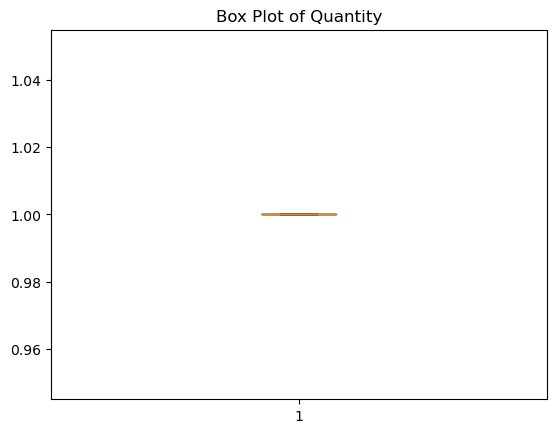

In [9]:
#Outliers will be represented as individual points outside the "whiskers" of the box plot.
plt.boxplot(data['Quantity'])
plt.title("Box Plot of Quantity")
plt.show()

Since there is no individual points, we can say that there is no outliers in the quantity. The graph we obtained is just a horizontal line over 1, it means that the value 1 is in all the rows.

8. What is the average GPA for student from each city?

In [28]:
#To find the average GPA of students from each city
city_gpa = data.groupby('City')['CGPA'].mean()
city_gpa = city_gpa.sort_values(ascending=False).reset_index()
print(city_gpa)

          City      CGPA
0        Delhi  9.014286
1       Raipur  8.980000
2      Sonipat  8.712500
3       konark  8.540000
4       Karnal  8.533333
..         ...       ...
172       Dhar  7.312500
173  Darbhanga  7.300000
174  New Delhi  7.142857
175      Daman  7.114286
176      Vasai  7.100000

[177 rows x 2 columns]


Delhi has the highest mean CGPA of approximately 9.014, indicating that, on average, students from Delhi have a very high academic performance.

Raipur follows closely with a mean CGPA of approximately 8.980, reflecting strong academic performance among students in Raipur.

Daman (CGPA 7.11), and Vasai (CGPA 7.10) have lower mean CGPA scores, indicating relatively lower academic performance compared to other cities.

MODERATE QUESTIONS

9. How many students from various cities?

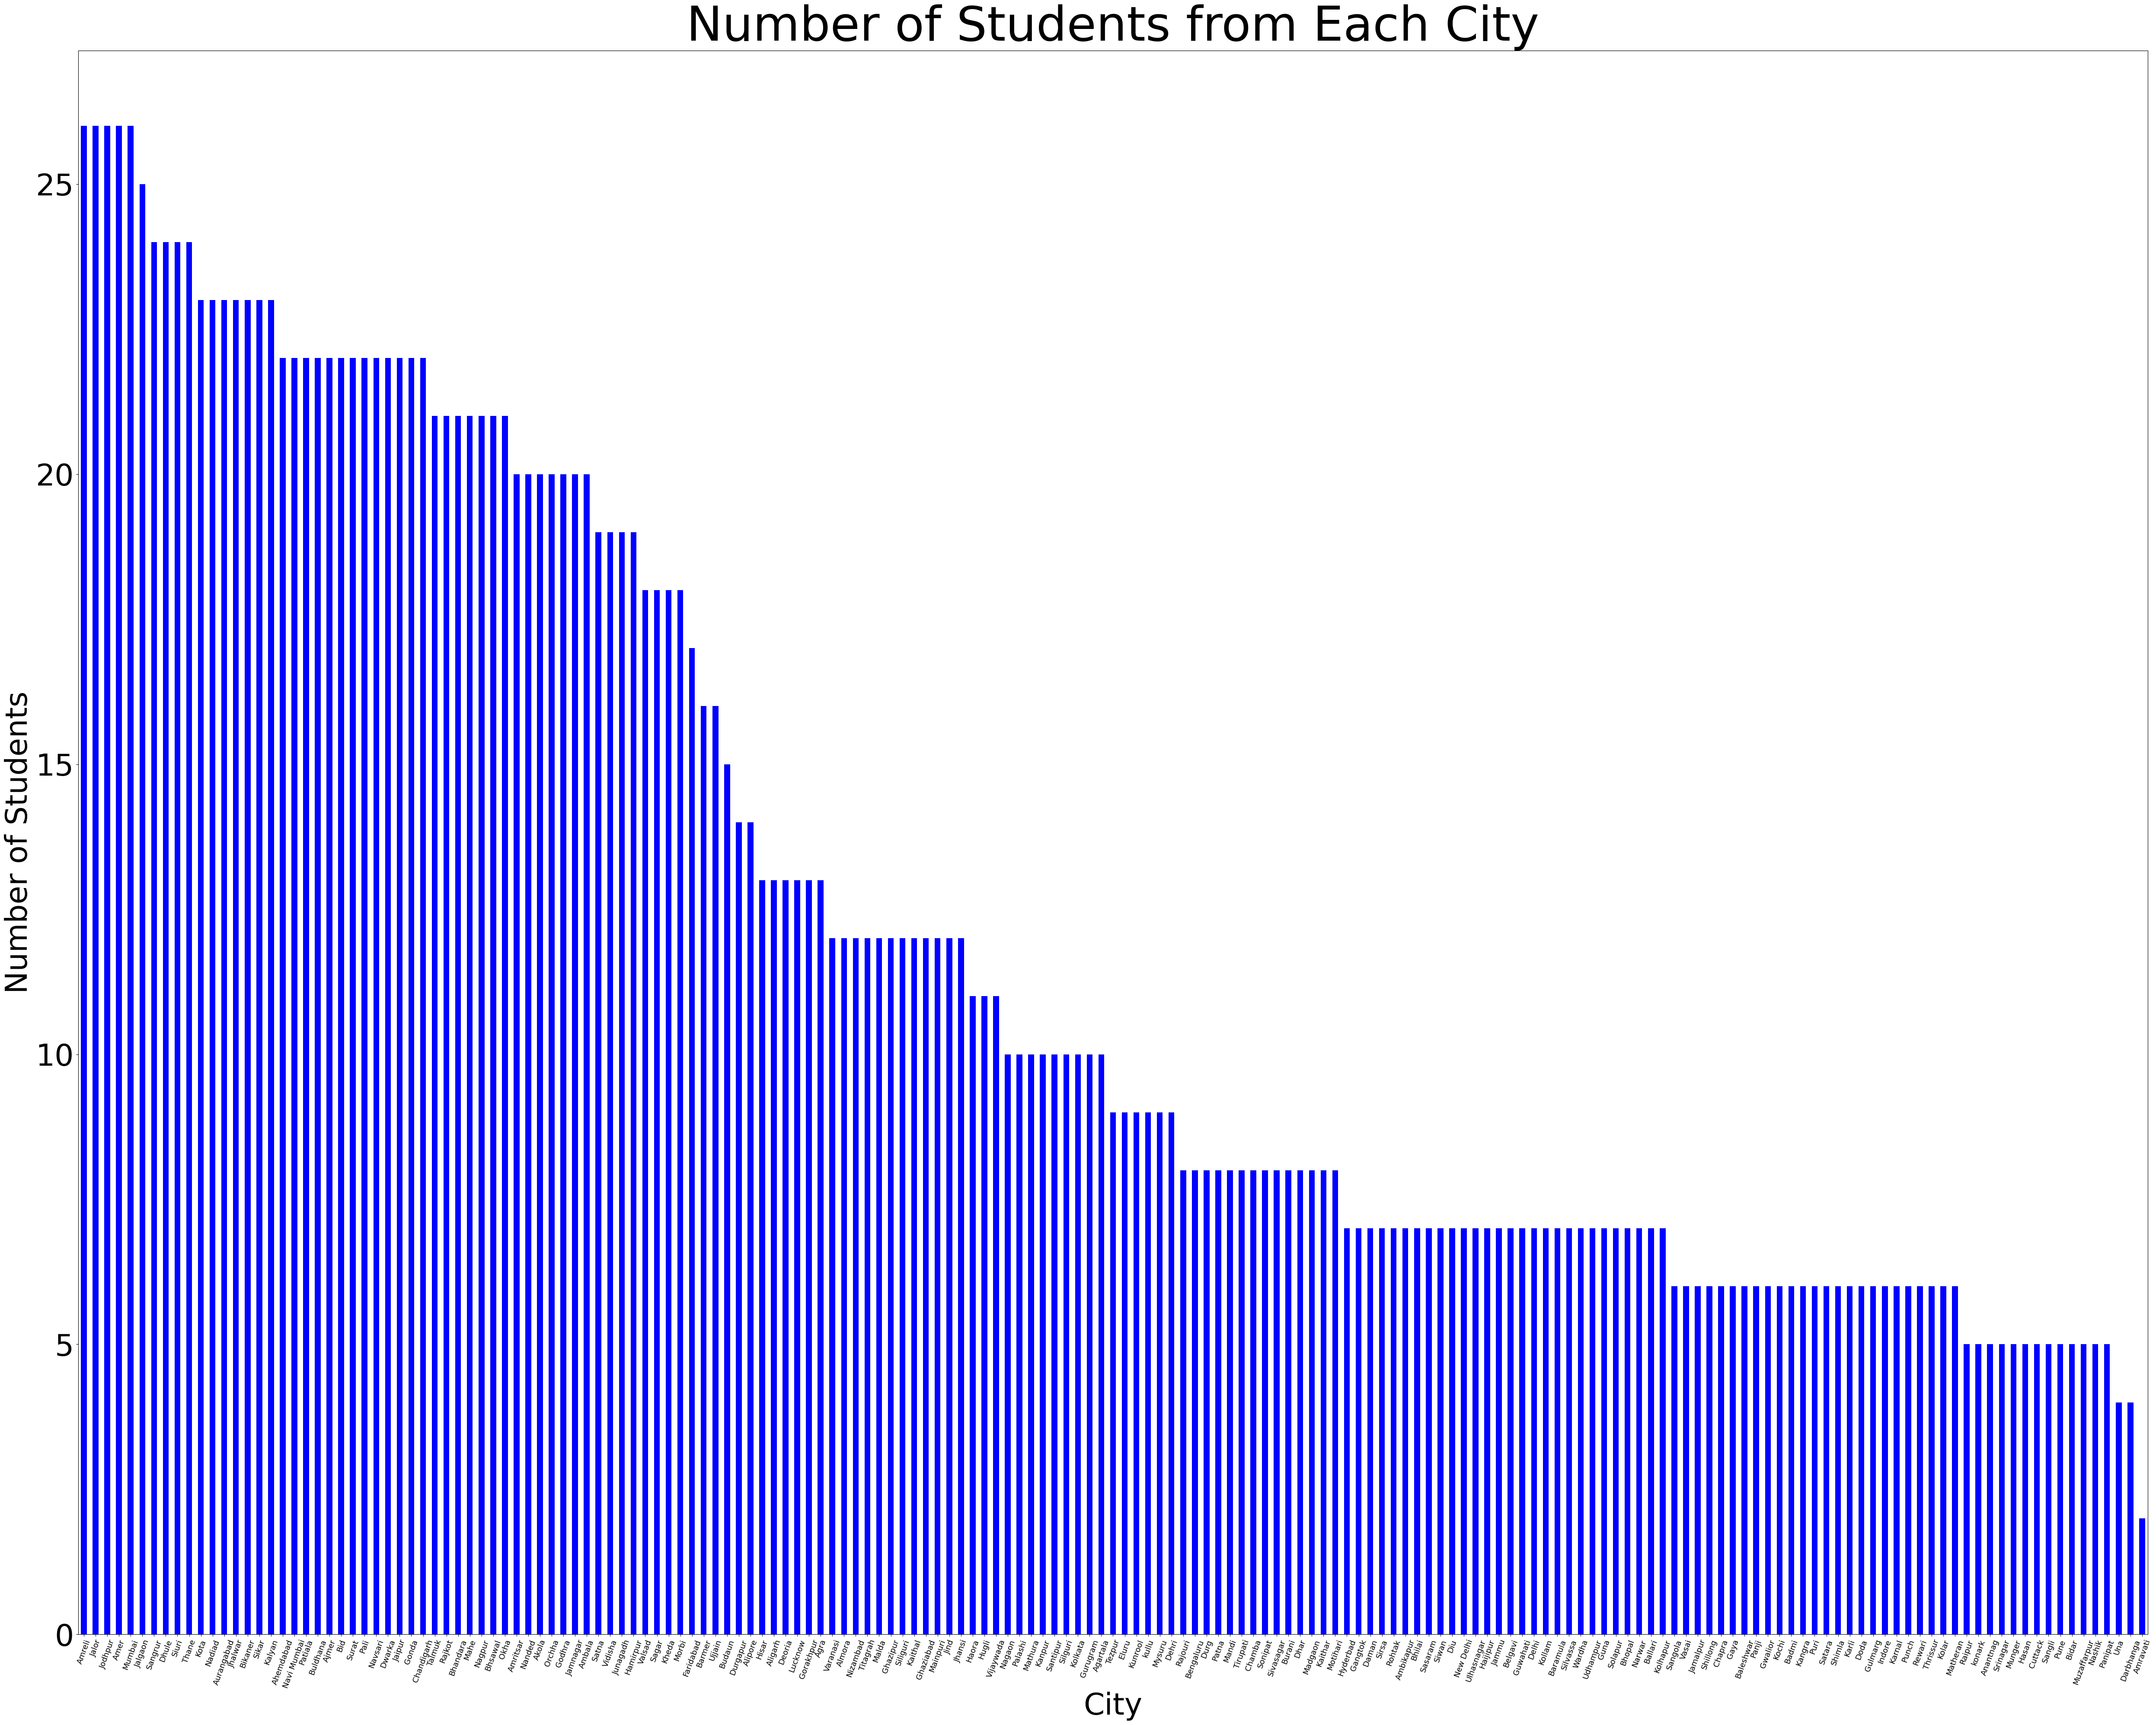

In [29]:
# Group the data by 'City' and count the number of students in each city
city_counts = data['City'].value_counts()

# Create a bar chart to visualize the number of students from each city
plt.figure(figsize=(50, 40))
city_counts.plot(kind='bar', color='blue')
plt.title('Number of Students from Each City',fontsize=80)
plt.xlabel('City', fontsize=50)
plt.ylabel('Number of Students', fontsize=50)
plt.xticks(rotation=70, fontsize=13)  
plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()


In [12]:
#To find the Top 88 cities
top_88 = city_counts.head(88)

plt.figure(figsize=(100, 70))  
sns.barplot(x=top_88.index, y=top_88.values, palette='viridis')

for i, count in enumerate(top_88):
    plt.text(i, count, str(count), ha='center', fontsize=70, rotation=45)
plt.title('Number of Students from the First 88 Cities', fontsize=100)
plt.xlabel('City', fontsize=70)
plt.ylabel('Number of Students', fontsize=70)
plt.xticks(rotation=70, fontsize=50)  
plt.yticks(fontsize=70) 

plt.tight_layout()
plt.show()

In [13]:
# To find the last 88 cities
last_89 = city_counts.tail(89)

plt.figure(figsize=(100, 70))  
sns.barplot(x=last_89.index, y=last_89.values, palette='viridis')

for i, count in enumerate(last_89):
    plt.text(i, count, str(count), ha='center', fontsize=70, rotation=45)
plt.title('Number of Students from the Last 89 Cities', fontsize=100)
plt.xlabel('City', fontsize=70)
plt.ylabel('Number of Students', fontsize=70)
plt.xticks(rotation=70, fontsize=50)  
plt.yticks(fontsize=70) 

plt.tight_layout()
plt.show()

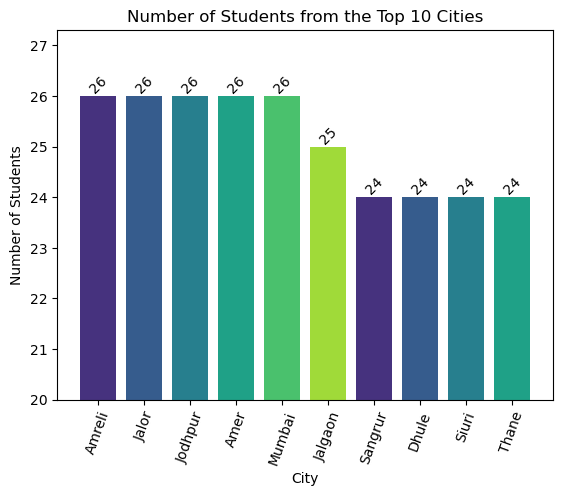

In [14]:
# To find the top 10 cities
top_10 = city_counts.head(10)
plt.title('Number of Students from the Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Students')

palette = sns.color_palette("viridis")

plt.bar(top_10.index, top_10.values, color=palette)

for i, count in enumerate(top_10):
    plt.text(i, count, str(count), ha='center', va='bottom', rotation=45)

plt.xticks(rotation=70)
plt.ylim(20) 
plt.show() 


From the graph, it appears that cities Amreli, Jalor, Jodhpur, Amer, and Mumbai have the highest number of student participants, each with 26 participants. 

10. How does the expected salary vary based on factors like "GPA", "Family Income", "Experience with Python (Months)'?

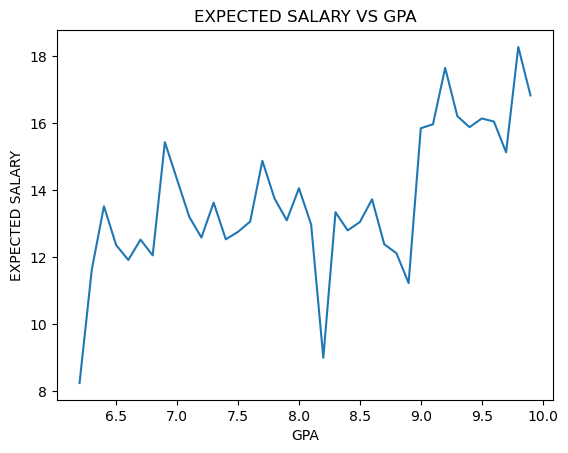

In [30]:
plt.title("EXPECTED SALARY VS GPA")
plt.xlabel('GPA')
plt.ylabel('EXPECTED SALARY')
GPA_EXP = data.groupby('CGPA')['Expected salary (Lac)'].mean()
plt.plot(GPA_EXP.index, GPA_EXP.values)
plt.show()

From the graph, while there is a positive trend, there is also variability in expected salaries for the same CGPA level. This indicates that CGPA is not the only factor determining salary, and other factors like skills, experience, and negotiation abilities may also play a role.

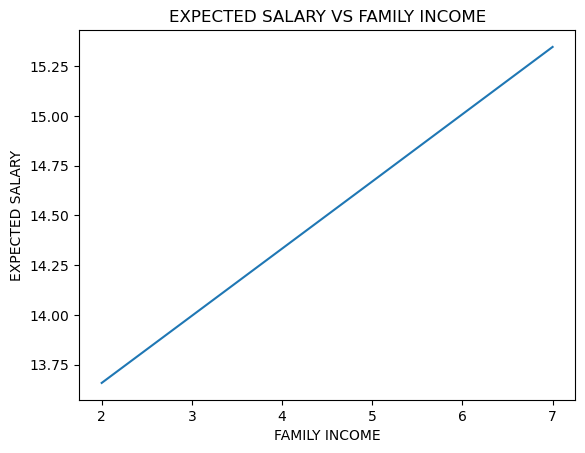

In [31]:
plt.title("EXPECTED SALARY VS FAMILY INCOME")
plt.xlabel('FAMILY INCOME')
plt.ylabel('EXPECTED SALARY')
NI_EXP = data.groupby('Numerical Income')['Expected salary (Lac)'].mean()
plt.plot(NI_EXP.index, NI_EXP.values)
plt.show()

From the graph, we can say that, as Family Income increases, the expected salary also tends to increase.

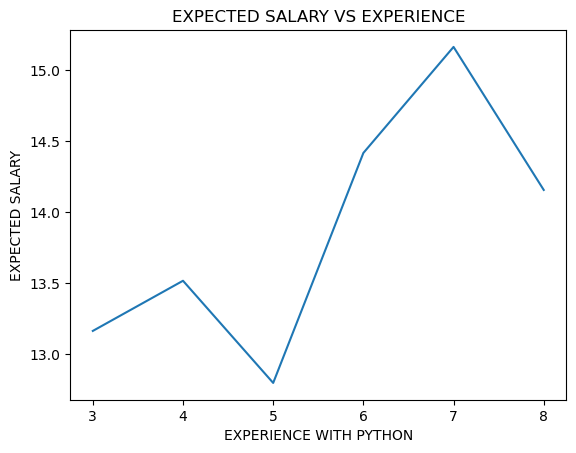

In [32]:
plt.title("EXPECTED SALARY VS EXPERIENCE")
plt.xlabel('EXPERIENCE WITH PYTHON')
plt.ylabel('EXPECTED SALARY')
EXPY_EXP = data.groupby('Experience with python (Months)')['Expected salary (Lac)'].mean()
plt.plot(EXPY_EXP.index, EXPY_EXP.values)
plt.show()

This graph suggests that individuals with more experience in Python tend to command higher salaries. We can also find that beyond 7 months, there is a slight decline in average salary, but it remains relatively high.

In [18]:
# Define the independent variables
X = data[['CGPA', 'Numerical Income', 'Experience with python (Months)']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = data['Expected salary (Lac)']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression analysis
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Expected salary (Lac)   R-squared:                       0.045
Model:                               OLS   Adj. R-squared:                  0.044
Method:                    Least Squares   F-statistic:                     34.17
Date:                   Sat, 30 Sep 2023   Prob (F-statistic):           1.42e-21
Time:                           11:13:16   Log-Likelihood:                -7004.0
No. Observations:                   2157   AIC:                         1.402e+04
Df Residuals:                       2153   BIC:                         1.404e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

The multiple linear regression analysis reveals that CGPA, Numerical Income, and Experience with Python (in months) have a statistically significant positive impact on expected salary. 

11. Which event tend to attract more students from specific fields of study?

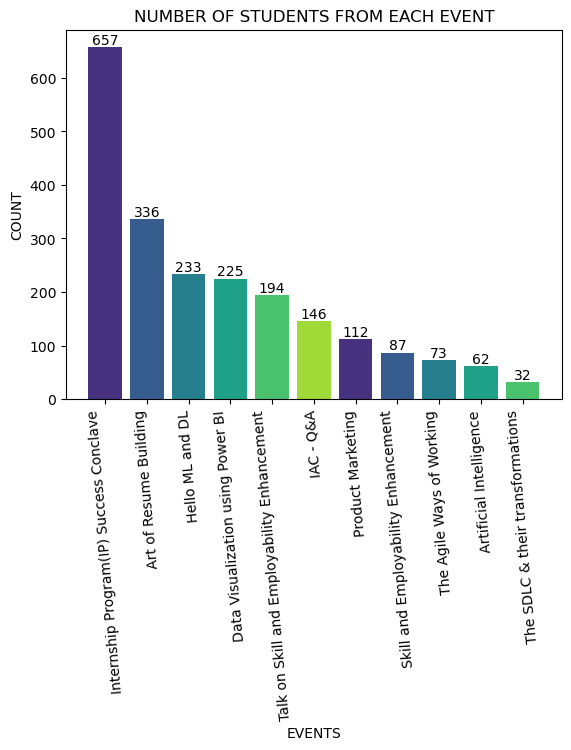

In [19]:
count_event=data['Events'].value_counts()
col = sns.color_palette('viridis')

plt.title("NUMBER OF STUDENTS FROM EACH EVENT")
plt.xlabel("EVENTS")
plt.ylabel("COUNT")
plt.bar(count_event.index, count_event.values, color=col)
for i, count in enumerate(count_event):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=95)
plt.show()

The event with the most participation is "Internship Program (IP) Success Conclave," which had 657 student participants.

The event with the least participation is "The SDLC & their transformations," which had only 32 student participants.

12. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

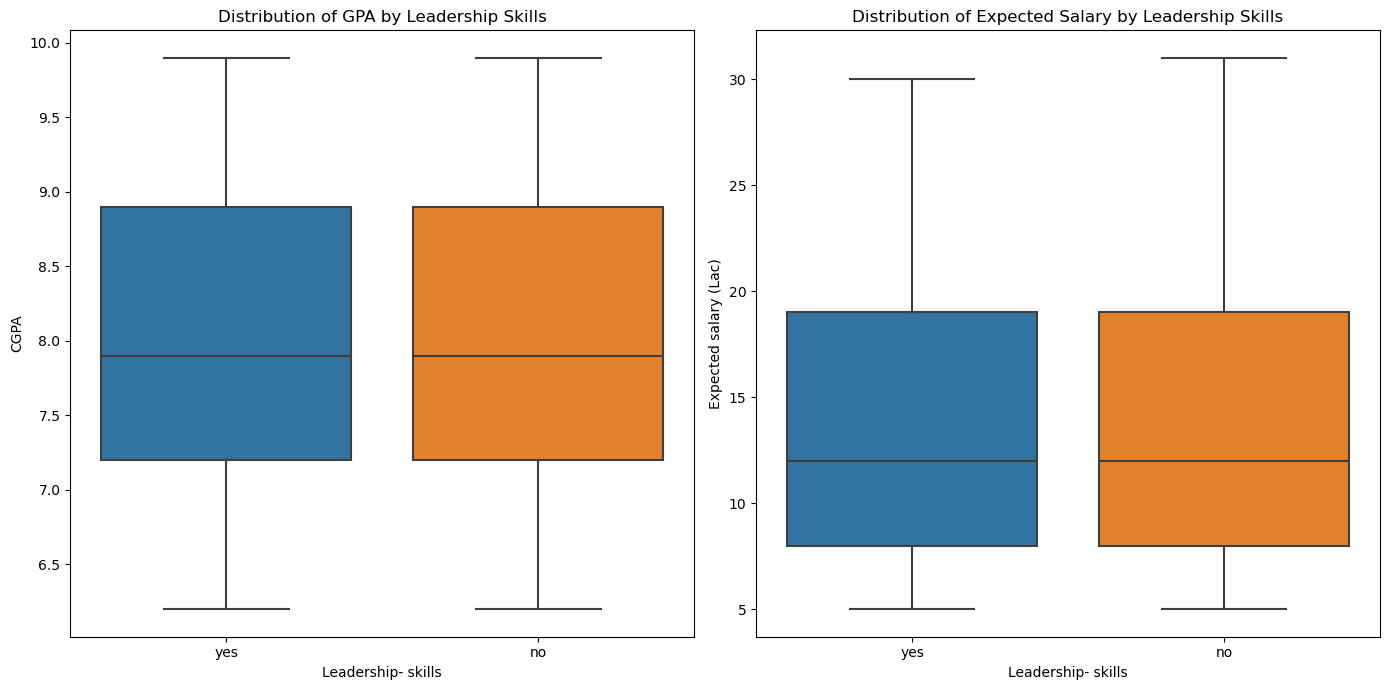

In [20]:
data['Leadership- skills'] = data['Leadership- skills'].replace('no ', 'no')

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='Leadership- skills', y='CGPA', data=data)
plt.title('Distribution of GPA by Leadership Skills')

plt.subplot(1, 2, 2)
sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=data)
plt.title('Distribution of Expected Salary by Leadership Skills')

plt.tight_layout()
plt.show()

Based on these graphs, neither CGPA nor expected salary is significantly different between students with leadership skills and those without. The differences observed are minimal and not statistically significant.

13. How many students are graduating by the end of 2024?

In [21]:
Count_2024 = data[data['Year of Graduation']<=2024]
print("The number of students graduating by the end of 2024 is: ",len(Count_2024))

The number of students graduating by the end of 2024 is:  1355


1355 students are going to graduate by the end of 2024

14. Which promotion channel brings in more student participations for the event?

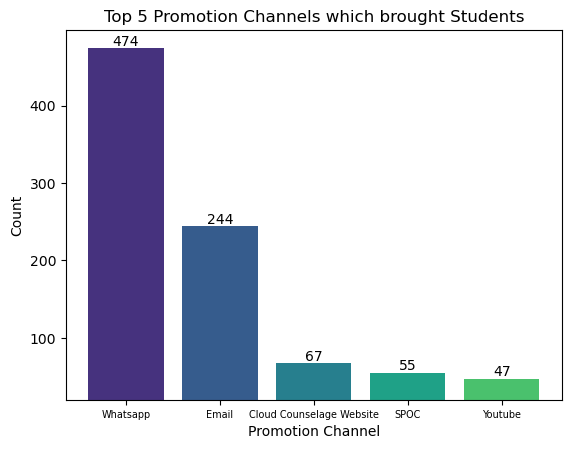

In [22]:
data['How_did_you_know'] = data.apply(lambda row: row['Specify in "Others" (how did you come to know about this event)'] if row['How did you come to know about this event?'] == 'Others' else row['How did you come to know about this event?'], axis=1)
Channel = data['How_did_you_know'].value_counts().head(5)

plt.title('Top 5 Promotion Channels which brought Students')
plt.xlabel('Promotion Channel')
plt.ylabel('Count')

palette = sns.color_palette("viridis")

plt.bar(Channel.index, Channel.values, color=palette)

for i, count in enumerate(Channel):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(fontsize=7)
plt.ylim(20) 
plt.show() 

The promotion channel which brought more students is WHATSAPP

15. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [23]:
Median_CGPA = data['CGPA'].median()
Median_Exp = data['Experience with python (Months)'].median()
Avg_Exp = data['Expected salary (Lac)'].mean()
print("The Average of Expected Salary of all students is :", Avg_Exp)
Selected_Students = data[(data['CGPA'] >= Median_CGPA) & (data['Experience with python (Months)']>=Median_Exp)]
Avg_Sal = Selected_Students['Expected salary (Lac)'].mean()
print("The Average of Expected Salary of those students who have higher CGPA and More Experience is: ",Avg_Sal)

The Average of Expected Salary of all students is : 13.753824756606397
The Average of Expected Salary of those students who have higher CGPA and More Experience is:  14.738651994497937


The students with high CGPA and More experience in language expect a higher salary than the overall average of 13.7.

16. How many students know about the event from their colleges? Which of these Top 5 colleges?

In [24]:
col_event = data[(data['How_did_you_know']=='College') | (data['How_did_you_know']=='Institute') | (data['How_did_you_know']=='From Academy')]
col_event = col_event.copy()
col_event['College Name'] = col_event['College Name'].str.upper()
print("The number of students who knew about the event from their colleges= ", len(col_event))
print("Out of which the TOP 5 Colleges are: ")
Top_col_event = col_event['College Name'].value_counts()
Top5col = Top_col_event.head(5)
print(Top5col)

The number of students who knew about the event from their colleges=  33
Out of which the TOP 5 Colleges are: 
WILSON COLLEGE                                                5
GOVERNMENT POLYTECHNIC GANDHINAGAR                            5
S.I.E.S. GRADUATE SCHOOL OF TECHNOLOGY, NERUL, NAVI MUMBAI    3
VISHWAKARMA INSTITUTE OF TECHNOLOGY, PUNE                     3
KLE SOCIETY'S COLLEGE OF BCA, RLS INSTITUTE, BELAGAVI         3
Name: College Name, dtype: int64


33 students knew about the event from their colleges, 

with WILSON COLLEGE and GOVERNMENT POLYTECHNIC GANDHINAGAR having the highest participation, each with 5 students. 

Additionally, S.I.E.S. GRADUATE SCHOOL OF TECHNOLOGY, NERUL, NAVI MUMBAI, VISHWAKARMA INSTITUTE OF TECHNOLOGY, PUNE, and KLE SOCIETY'S COLLEGE OF BCA, RLS INSTITUTE, BELAGAVI, had 3 students each who were aware of the event through their colleges.

17. Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)

In [25]:
# Create a dataframe with events 'Data Visualization using Power BI', 'Artificial Intelligence' and 'Hello ML and DL'
DataScience = data[(data['Events']=='Data Visualization using Power BI') | (data['Events']=='Artificial Intelligence') | (data['Events']=='Hello ML and DL')]

print("The number of students who chose Data Science related events:\n", DataScience['Events'].value_counts())
print("\n The total number of students who attended the events related to Data Science: ",len(DataScience))

The number of students who chose Data Science related events:
 Hello ML and DL                      233
Data Visualization using Power BI    225
Artificial Intelligence               62
Name: Events, dtype: int64

 The total number of students who attended the events related to Data Science:  520


520 students attended the events related to Data Science